<a href="https://colab.research.google.com/github/riyaz7781/riyaz7781/blob/main/SLR(Question_1)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries




In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sa
import warnings
warnings.filterwarnings("ignore")

Load the dataset

In [28]:
data=pd.read_csv("/content/delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


Exploratory Data Analysis and Data Visualisation

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


Feature Engineering

In [30]:
data1=data.rename({"Delivery Time":"DT","Sorting Time":"ST"},axis=1)
data1

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


Transformation Graphs

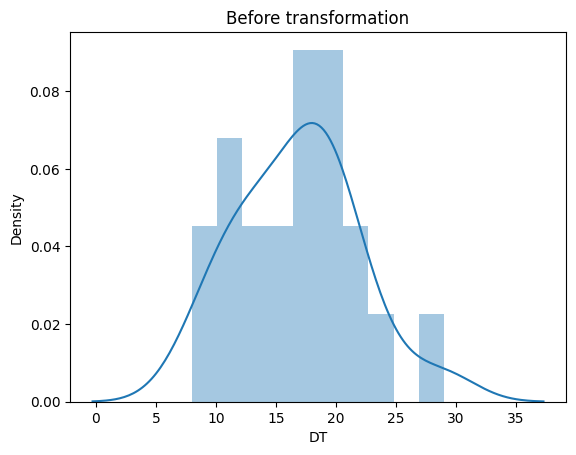

In [46]:
sns.distplot(data1["DT"],bins=10)
plt.title("Before transformation")
plt.show()

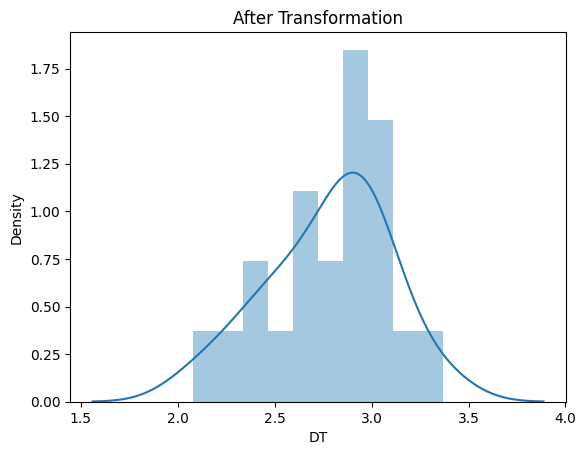

In [45]:
sns.distplot(np.log(data1["DT"]),bins=10)
plt.title("After Transformation")
plt.show()

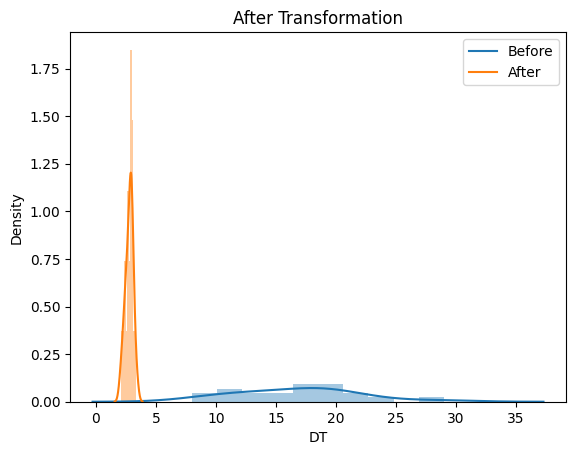

In [48]:
labels=["Before","After"]
sns.distplot(data1["DT"],bins=10)
plt.title("Before Transformation")
sns.distplot(np.log(data1["DT"]),bins=10)
plt.title("After Transformation")
plt.legend(labels)
plt.show()

Appling LOG,SQRT,CBRT to observe any transformation

Text(0.5, 1.0, 'Cube Transformation')

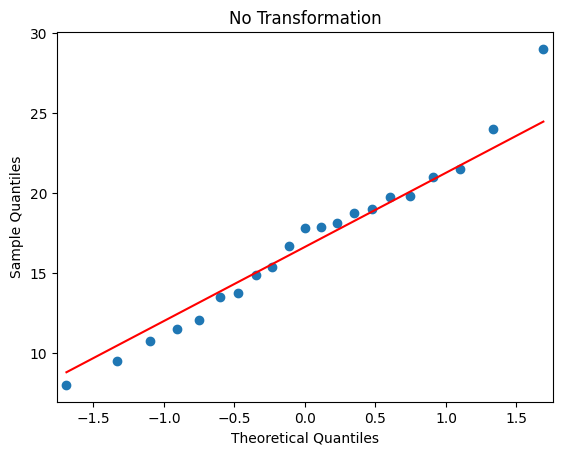

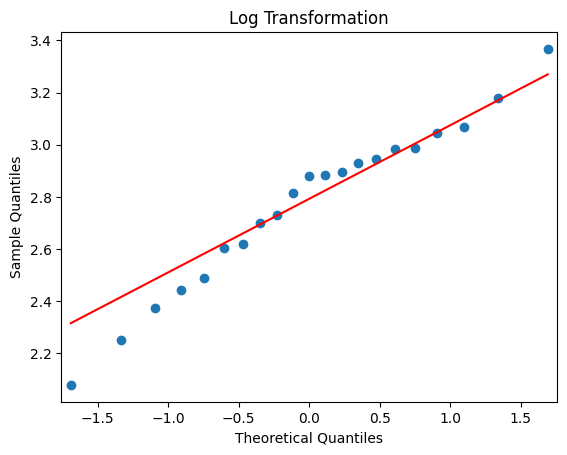

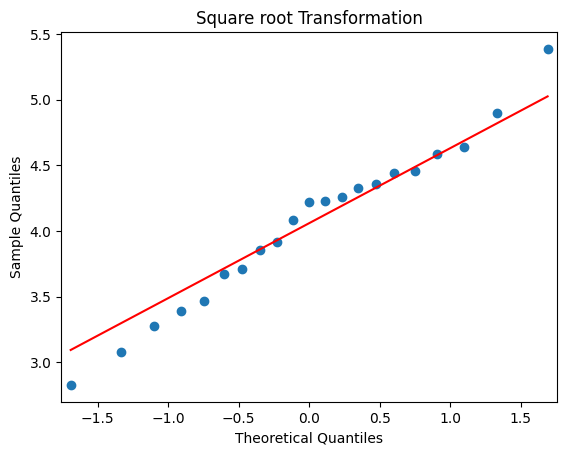

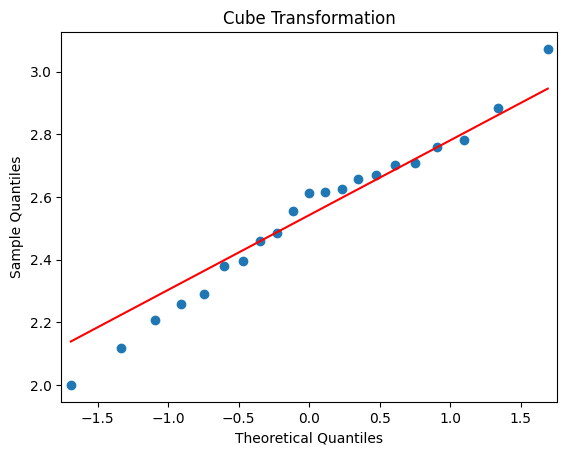

In [50]:
sa.qqplot(data1["DT"],line="q")
plt.title("No Transformation")
sa.qqplot(np.log(data1["DT"]),line="q")
plt.title("Log Transformation")
sa.qqplot(np.sqrt(data1["DT"]),line="q")
plt.title("Square root Transformation")
sa.qqplot(np.cbrt(data1["DT"]),line="q")
plt.title("Cube Transformation")

Correlation Analysis

In [34]:
data1.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


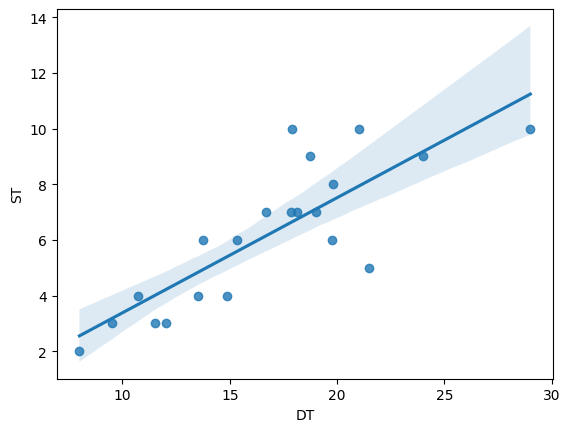

In [35]:
sns.regplot(x=data1["DT"],y=data1["ST"])
plt.show()

Model Building

In [36]:
model=smf.ols("DT~ST",data=data1).fit()

In [37]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [ ]:
model1=smf.ols("np.log(DT)~np.log(ST)",data=data1).fit()
model1.summary()

In [ ]:
model2=smf.ols("np.sqrt(DT)~np.sqrt(ST)",data=data1).fit()
model2.summary()

In [ ]:
model3=smf.ols("np.cbrt(DT)~np.cbrt(ST)",data=data1).fit()
model3.summary()

In [70]:
from sklearn.metrics import mean_squared_error
model1_pred_y =np.log(model1.predict(data1['ST']))
model2_pred_y =np.square(model2.predict(data1['ST']))
model3_pred_y =pow(model3.predict(data1['ST']),3)
model1_rmse =np.sqrt(mean_squared_error(data1['ST'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(data1['ST'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(data1['ST'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)


model= 2.934903768890139 
model1= 5.6970466929501224 
model2= 10.635251257174312 
model3= 10.610345935778614


Here our untransformed model RSME value is low
so we considered that model

Model Testing

In [38]:
model.tvalues,model.pvalues

(Intercept    3.823349
 ST           6.387447
 dtype: float64,
 Intercept    0.001147
 ST           0.000004
 dtype: float64)

In [39]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

Model Prediction

In [40]:
DT=1.649020*5+6.582734
DT

14.827834

In [41]:
new_data=pd.DataFrame([5,8],columns=["ST"])
new_data

,ST
0,5
1,8


In [42]:
model.predict(new_data)

0    14.827833
1    19.774893
dtype: float64